In [2]:
import pandas as pd

data = pd.read_csv('click_stream2.csv', header=None, names=['id','page','date','device'])

data.head()

,id,page,date,device
0,313593,1_home_page,2015-02-26,Desktop
1,468315,1_home_page,2015-02-21,Desktop
2,264005,1_home_page,2015-03-25,Desktop
3,290784,1_home_page,2015-03-14,Desktop
4,639104,1_home_page,2015-01-03,Desktop


In [4]:
data['month'] = data['date'].apply(lambda date: date[0:7])
data.head()

,id,page,date,device,month
0,313593,1_home_page,2015-02-26,Desktop,2015-02
1,468315,1_home_page,2015-02-21,Desktop,2015-02
2,264005,1_home_page,2015-03-25,Desktop,2015-03
3,290784,1_home_page,2015-03-14,Desktop,2015-03
4,639104,1_home_page,2015-01-03,Desktop,2015-01


In [6]:
monthly = data.groupby(['page','month', 'device'])['id'].agg('count').reset_index().sort_values(by='page', ascending=False)
monthly.head()

,page,month,device,id
31,4_payment_confirmation_page,2015-04,Mobile,24
30,4_payment_confirmation_page,2015-04,Desktop,22
29,4_payment_confirmation_page,2015-03,Mobile,30
28,4_payment_confirmation_page,2015-03,Desktop,14
27,4_payment_confirmation_page,2015-02,Mobile,119


In [7]:
months = monthly.groupby('month')['id'].sum().reset_index()
months

,month,id
0,2015-01,38733
1,2015-02,38872
2,2015-03,32154
3,2015-04,32323


In [8]:
import matplotlib.pyplot as plt

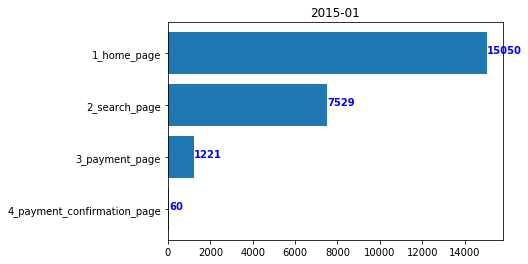

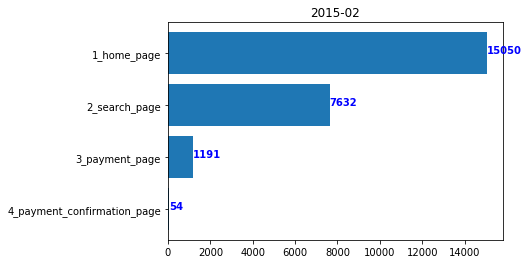

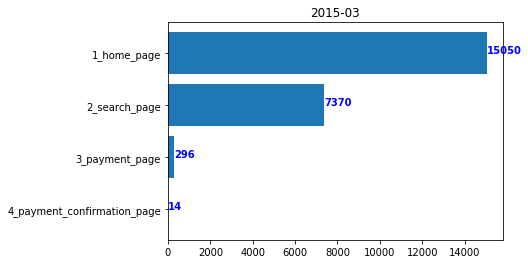

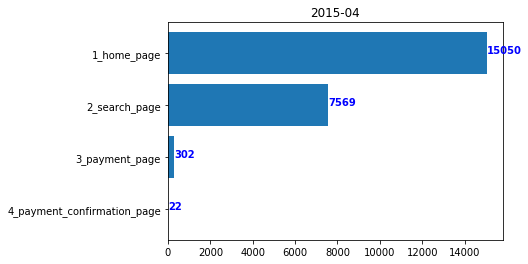

In [11]:
Desktop = monthly[monthly['device']=='Desktop'] 
for index, row in months.iterrows():
    fig, subplot = plt.subplots()
    y = Desktop[Desktop['month']==row.month].id
    subplot.barh(Desktop[Desktop['month']==row.month].page, 
           y)
    subplot.set_title(row.month)
    for i, v in enumerate(y):
        subplot.text(v + 3, i, str(v), color='blue', fontweight='bold')

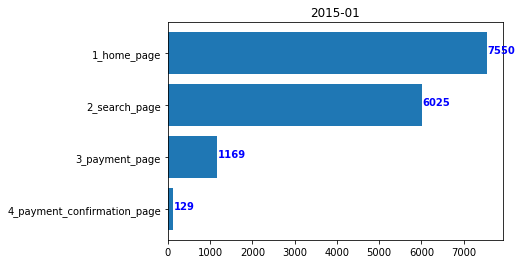

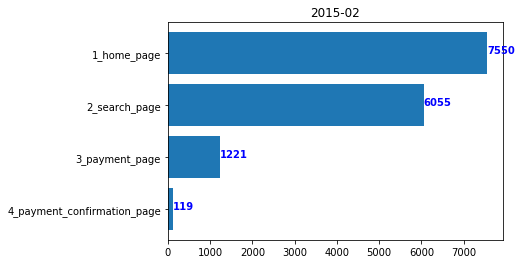

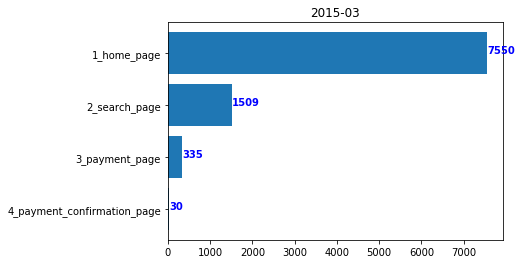

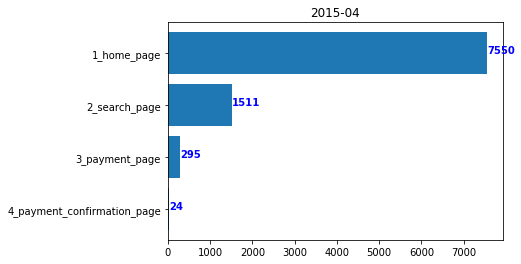

In [12]:
Mobile = monthly[monthly['device']=='Mobile'] 
for index, row in months.iterrows():
    fig, subplot = plt.subplots()
    y = Mobile[Mobile['month']==row.month].id
    subplot.barh(Mobile[Mobile['month']==row.month].page, 
           y)
    subplot.set_title(row.month)
    for i, v in enumerate(y):
        subplot.text(v + 3, i, str(v), color='blue', fontweight='bold')